# Experiments with Multi Scale Entropy for Unsupervised Classification

Reference: https://arxiv.org/abs/2206.13529

## Imports

In [26]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

from umap import UMAP
from pyentrp import entropy as ent

## Load ELAsTiCC data set

In [6]:
def load(file_name):
    with open(file_name, 'rb') as f:
        return pickle.load(f)

In [7]:
test_dir = "/Users/vedshah/Documents/Research/UIUCSN/Projects/ELAsTiCC-Classification/processed/train"
X_ts = load(f"{test_dir}/x_ts.pkl")
X_static = load(f"{test_dir}/x_static.pkl")
Y = load(f"{test_dir}/y.pkl")
astrophysical_classes = load(f"{test_dir}/a_labels.pkl")

## Loop through and compute the entropies

In [30]:
filtered_classes = []
filtered_entropies = []

for i in range(len(X_ts)):

    # Find the detections
    phot_flag = X_ts[i]['detection_flag']
    idx = np.where(phot_flag==1)[0]

    # Find the time series and rescale
    time = X_ts[i]['scaled_time_since_first_obs'].to_numpy()[idx] * 100
    flux = X_ts[i]['scaled_FLUXCAL'].to_numpy()[idx] #* 1000

    if np.all(flux>0) and len(idx) >= 100 and len(idx) <= 200:

        
        # Find the multiscale entropy
        mean = np.mean(flux)
        std = np.std(flux)
        flux_norm = (flux - mean) / std
        
        e = ent.multiscale_entropy(flux_norm, 1, maxscale=10)

        filtered_classes.append(astrophysical_classes[i])
        filtered_entropies.append(e)

/var/folders/t6/gdw9ytlx48nd402t7_62k3r00000gn/T/ipykernel_16155/3401244987.py:24: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  if len(np.where(filtered_entropies==np.inf)[0]) == 0:


In [31]:
filtered_entropies = np.array(filtered_entropies)
filtered_classes = np.array(filtered_classes)

In [35]:
inf_idx = np.where(filtered_entropies==np.inf)[0]
filtered_entropies = np.delete(filtered_entropies, inf_idx, axis=0)
filtered_classes = np.delete(filtered_classes, inf_idx, axis=0)

In [36]:
filtered_entropies.shape

(6, 11427)

In [37]:
reducer = UMAP(random_state=42)
embedding = reducer.fit_transform(filtered_entropies)
embedding.shape

/Users/vedshah/anaconda3/envs/multi-scale-entropy/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/vedshah/anaconda3/envs/multi-scale-entropy/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(11427, 2)

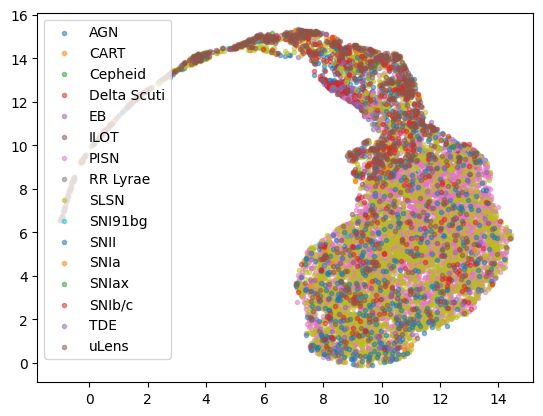

In [43]:
for c in np.unique(filtered_classes):
    idx = np.where(filtered_classes == c)[0]
    plt.scatter(embedding[idx, 0], embedding[idx, 1], label=c, marker='.', alpha=0.5)

plt.legend()

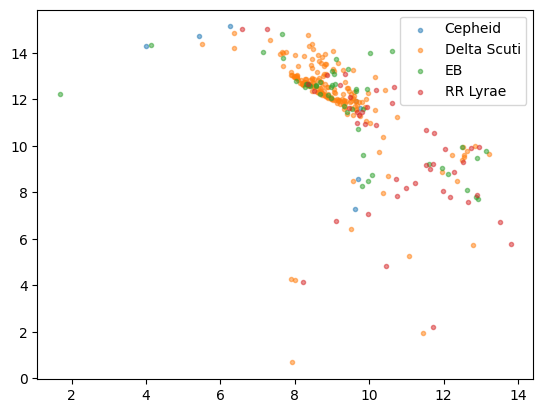

In [41]:
for c in np.unique(filtered_classes):
    idx = np.where(filtered_classes == c)[0]
    if c in ["Cepheid", "Delta Scuti", "EB", "RR Lyrae"]:
        plt.scatter(embedding[idx, 0], embedding[idx, 1], label=c, marker='.', alpha=0.5)

plt.legend()

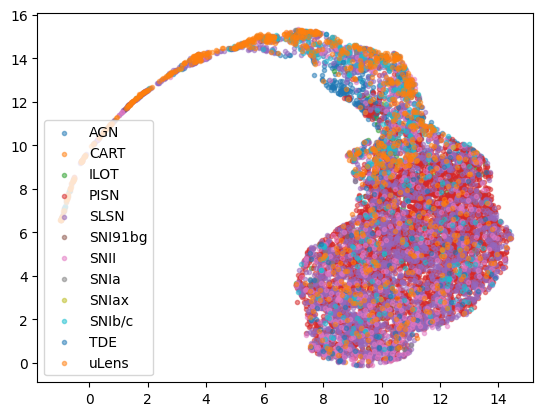

In [42]:
for c in np.unique(filtered_classes):
    idx = np.where(filtered_classes == c)[0]
    if c not in ["Cepheid", "Delta Scuti", "EB", "RR Lyrae"]:
        plt.scatter(embedding[idx, 0], embedding[idx, 1], label=c, marker='.', alpha=0.5)

plt.legend()